In [ ]:
%%capture
!pip install lightautoml

In [ ]:
a = []
while(1):
    a.append('1')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pochta/train_dataset_train.csv')

ParserError: ignored

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,5.0,1.0,0.0,2.0,0.00,0.0,"Fishhook,USB",41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,5.0,1.0,0.0,2.0,0.00,0.0,"screen protector,Case(Q613B),case(208B40-DB)",68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,5.0,1.0,0.0,2.0,0.00,0.0,"Pendant Necklaces,Rings for Women,Necklaces",56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,5.0,1.0,0.0,2.0,35.34,0.0,Motorcycle Signal Lamp,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,5.0,1.0,0.0,2.0,52.52,0.0,backpack,716.0,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976.0,ММПО,7503.0,N,0.0,N,N,25.0,5.0,0.0,0.0,2.0,0.00,0.0,KEY CHAIN,24.0,100.0,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0
5999996,2234489,1022_-1,241963.0,Цех,7503.0,N,0.0,Y,N,83.0,5.0,1.0,0.0,2.0,0.00,0.0,Dolls,100.0,1832.0,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0
5999997,4304572,1041_-1,102971.0,Цех,7506.0,N,0.0,N,N,1700.0,5.0,1.0,0.0,2.0,94.09,0.0,Down jacket,952.0,800.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0
5999998,6550634,1018_-1,102152.0,Цех,7506.0,N,0.0,N,N,269.0,5.0,1.0,0.0,2.0,0.00,0.0,0,0.0,0.0,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0


In [ ]:
df["is_in_yandex"] = pd.Categorical(df["is_in_yandex"])
df["is_in_yandex"].astype('category').cat.codes
df["is_in_yandex"] = df["is_in_yandex"].cat.codes

In [ ]:
df["is_return"] = pd.Categorical(df["is_return"])
df["is_return"].astype('category').cat.codes
df["is_return"] = df["is_return"].cat.codes

In [ ]:
def op_t(x):
    return x[:x.find('_')]
def op_a(x):
    return x[x.find('_')+1:]

In [ ]:
df['op_t'] = df['oper_type + oper_attr'].apply(op_t).astype('int64')
df['op_a'] = df['oper_type + oper_attr'].apply(op_a).astype('int64')

In [ ]:
qq =  pd.read_csv('/content/drive/MyDrive/Pochta/PIndx20.csv')

In [ ]:
qq['index_oper'] = qq['INDEX'].values

In [ ]:
def p_to_int(x):
    if type(x) == float:
        return int(x)
    return x[:x.find('.')]

#df['index_oper'] = df['index_oper'].apply(p_to_int)
def nd(x):
    if x == '':
        return 0
    x = int(x)
    if x // 10**5 >0:
        return 6
    elif x // 10**4 >0:
        return 5
    elif x // 10**3 >0:
        return 4

def from5t6(x):
    if x == '':
        return 0
    x = int(x)
    if x // 10**5 == 0:
        return x*10
    return x

In [ ]:

def nd(x):
    if x == '':
        return 0
    x = int(x)
    if x // 10**5 >0:
        return 6
    elif x // 10**4 >0:
        return 5
    elif x // 10**3 >0:
        return 4

def from5t6(x):
    if x == '':
        return 0
    x = int(x)
    if x // 10**5 == 0:
        return x*10
    return x

pld2 = pd.DataFrame(columns = ['index_oper','new_index_oper','OPSSUBM','REGION','AUTONOM','CITY','ACTDATE'])
pld = pd.DataFrame(columns = ['index_oper','new_index_oper'])
pld['index_oper'] = df['index_oper'].values
pld2['index_oper'] = df['index_oper'].values
qq['new_index_oper'] = qq['INDEX'].values

for i in range(10):
    def from5t6(x):
        if x == '':
            return 0
        x = int(float(x))
        if x // 10**5 == 0:
            return x*10 + i
        return x
    pld['new_index_oper'] = pld['index_oper'].apply(from5t6)
    pld2['new_index_oper'] = pld2['index_oper'].apply(from5t6)
    
    pz = pd.merge(pld, qq[['new_index_oper','OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']],how = 'left', on="new_index_oper")
    
    pld['index_oper'][pz['ACTDATE'].isna() == False]['index_oper'] = pz[pz['ACTDATE'].isna() == False]['new_index_oper'].values
    pld2['index_oper'][pz['ACTDATE'].isna() == False]['index_oper'] = pz[pz['ACTDATE'].isna() == False]['new_index_oper'].values
    #pld[['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']] = pz[pz['ACTDATE'].isna() == False][['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']].values
    pld2.loc[pz['ACTDATE'].isna() == False,['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']] = pz[pz['ACTDATE'].isna() == False][['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']].values
    
    
    

    


In [ ]:

pld2['AREA'] = (pld2['REGION'].fillna('') + pld2['AUTONOM'].fillna('')).values

In [ ]:

pld2.drop(['REGION','AUTONOM'],axis = 1,inplace = True)

In [ ]:

pld2.loc[pld2['AREA'] == 'МОСКВА','CITY'] = pld2[pld2['AREA'] == 'МОСКВА']['CITY'].fillna('МОСКВА').values

In [ ]:

big_df = pd.concat([df,pld2.drop(['index_oper'],axis=1)],axis = 1)

In [ ]:

big_df['ACTDATE'] = pd.to_datetime(big_df['ACTDATE'])

In [ ]:
def npust(x):
    if x == '':
        return 0
    return int(x)

In [ ]:
big_df['index_oper'] = big_df['index_oper'].apply(npust)
big_df['new_index_oper'] = big_df['new_index_oper'].apply(npust)

In [ ]:

big_df['OPSSUBM'] = big_df['OPSSUBM'].fillna(0).apply(npust)

In [ ]:
big_df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label,op_t,op_a,new_index_oper,OPSSUBM,CITY,ACTDATE,AREA
0,6818780,1043_-1,628629,Участок,7503.0,N,0.0,2,0,87.0,5.0,1.0,0.0,2.0,0.00,0.0,"Fishhook,USB",41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,1043,-1,628629,628600,НИЖНЕВАРТОВСК,2017-09-06,ХАНТЫ-МАНСИЙСКИЙ-ЮГРА АВТОНОМНЫЙ ОКРУГ
1,9907176,1023_-1,102976,ММПО,7503.0,N,0.0,1,0,107.0,5.0,1.0,0.0,2.0,0.00,0.0,"screen protector,Case(Q613B),case(208B40-DB)",68.0,400.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0,1023,-1,102976,102975,ШАРАПОВО,2020-04-02,МОСКВА
2,3304275,1018_-1,620962,Цех,7503.0,N,0.0,2,0,50.0,5.0,1.0,0.0,2.0,0.00,0.0,"Pendant Necklaces,Rings for Women,Necklaces",56.0,218.0,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0,1018,-1,620962,620960,ЕКАТЕРИНБУРГ,2010-06-18,СВЕРДЛОВСКАЯ ОБЛАСТЬ
3,9020937,1019_-1,344964,Цех,7503.0,N,0.0,2,0,416.0,5.0,1.0,0.0,2.0,35.34,0.0,Motorcycle Signal Lamp,33.0,100.0,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0,1019,-1,344964,344960,РОСТОВ-НА-ДОНУ,2010-06-18,РОСТОВСКАЯ ОБЛАСТЬ
4,3082311,1020_-1,629819,Участок,7503.0,N,0.0,2,0,795.0,5.0,1.0,0.0,2.0,52.52,0.0,backpack,716.0,1000.0,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0,1020,-1,629819,629800,НОЯБРЬСК,2017-09-11,ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,9958614,1022_-1,102976,ММПО,7503.0,N,0.0,1,0,25.0,5.0,0.0,0.0,2.0,0.00,0.0,KEY CHAIN,24.0,100.0,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0,1022,-1,102976,102975,ШАРАПОВО,2020-04-02,МОСКВА
5999996,2234489,1022_-1,241963,Цех,7503.0,N,0.0,2,0,83.0,5.0,1.0,0.0,2.0,0.00,0.0,Dolls,100.0,1832.0,31.0,1767370.0,144063.0,1911433.0,15582018.0,0,0,0,0,0,1022,-1,241963,241960,БРЯНСК,2010-06-18,БРЯНСКАЯ ОБЛАСТЬ
5999997,4304572,1041_-1,102971,Цех,7506.0,N,0.0,1,0,1700.0,5.0,1.0,0.0,2.0,94.09,0.0,Down jacket,952.0,800.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0,1041,-1,102971,102975,ШАРАПОВО,2020-04-02,МОСКВА
5999998,6550634,1018_-1,102152,Цех,7506.0,N,0.0,1,0,269.0,5.0,1.0,0.0,2.0,0.00,0.0,0,0.0,0.0,105.0,15091338.0,4972424.0,20063762.0,39988530.0,0,1,0,0,0,1018,-1,102152,102150,МОСКВА,2007-04-18,МОСКВА


In [ ]:
big_df.to_csv('big_df.csv')

# BIGI

In [ ]:
big_df = pd.read_csv('big_df.csv')

In [ ]:
N_THREADS = 32
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 900*4 # equal to 15*4 minutes
TARGET_NAME = 'label'

In [ ]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [ ]:
del pld

In [ ]:
del df

In [ ]:
del pz

In [ ]:
tr_data, te_data = train_test_split(
    big_df.drop(['Unnamed: 0','op_t'],axis = 1), 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()

Data splitted. Parts sizes: tr_data = (4800000, 35), te_data = (1200000, 35)


,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label,op_a,new_index_oper,OPSSUBM,CITY,ACTDATE,AREA
3604976,4619089,1041_-1,243149,П,7503.0,N,2.0,2,0,141.0,5.0,1.0,0.0,2.0,22.59,0.0,Blocks,37.0,190.0,7.0,72206.0,7646.0,79852.0,1110354.0,0,0,1,0,0,-1,243149,241700,КЛИНЦЫ,2007-10-04,БРЯНСКАЯ ОБЛАСТЬ
5936295,1004170,1020_-1,68396,Участок,7503.0,N,0.0,2,0,736.0,5.0,1.0,0.0,2.0,50.12,0.0,Slippers,520.0,300.0,15.0,487093.0,147547.0,634640.0,4821535.0,0,0,0,0,0,-1,683969,683960,ЕЛИЗОВО,2018-02-28,КАМЧАТСКИЙ КРАЙ
1804115,2569448,1004_-1,10297,ММПО,7503.0,N,0.0,1,0,175.0,5.0,0.0,0.0,2.0,0.00,0.0,Mobile Phone Cases & Covers,80.0,100.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,0,0,1,0,1,-1,102979,102975,ШАРАПОВО,2020-04-02,МОСКВА
4351206,5506132,1023_-1,620984,Участок,7503.0,N,0.0,1,0,753.0,5.0,1.0,0.0,2.0,50.81,0.0,rhinestone,1.0,7.0,27.0,9164121.0,4770841.0,13934962.0,14030822.0,0,0,1,0,0,-1,620984,620980,ЕКАТЕРИНБУРГ,2013-10-21,СВЕРДЛОВСКАЯ ОБЛАСТЬ
5014389,727375,1018_-1,102971,Цех,7506.0,N,0.0,1,0,1138.0,5.0,1.0,0.0,2.0,68.54,0.0,Jewelry Findings & Components,10.0,380.0,186.0,60613352.0,10648.0,60624000.0,75592387.0,0,0,0,0,0,-1,102971,102975,ШАРАПОВО,2020-04-02,МОСКВА


In [ ]:
del big_df

In [ ]:
task = Task('binary', loss = 'logloss', metric = 'auc')

In [ ]:
roles = {
    'target': TARGET_NAME,
    'drop': ['id','name_mfi','oper_type + oper_attr']
}

In [ ]:
automl = TabularAutoML(
    task = task, 
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)

In [ ]:
%%time 
oof_pred = automl.fit_predict(tr_data, roles = roles, verbose = 1)

[16:46:08] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[16:46:09] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


[16:46:09] Task: binary



INFO:lightautoml.automl.presets.base:Task: binary



[16:46:09] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[16:46:09] - time: 3600.00 seconds


INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds


[16:46:09] - CPU: 32 cores


INFO:lightautoml.automl.presets.base:- CPU: 32 cores


[16:46:09] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[16:46:09] Train data shape: (4800000, 35)



INFO:lightautoml.reader.base:Train data shape: (4800000, 35)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[16:46:28] Layer 1 train process start. Time left 3580.70 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3580.70 secs


[16:50:49] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [42, 43, 44, 45, 46, 47, 48], 'embed_sizes': array([19, 20,  5,  4, 25, 14,  9], dtype=int32), 'data_size': 49}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = 0.9446856614155261
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = 0.9466001643688189
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = 0.9470785441516022
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = 0.9481050423201239
INFO3:lightautoml.ml_algo.torch_based.linear_mode

[16:55:14] Time limit exceeded after calculating fold 1



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 1



[16:55:15] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.948246749328403


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.948246749328403


[16:55:15] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[16:55:15] Time left 3053.82 secs



INFO:lightautoml.automl.base:Time left 3053.82 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.974161
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.974539
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's auc: 0.97473
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's auc: 0.974854
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	valid's auc: 0.974966
DEBUG:lightautoml.ml_algo.boost_lgbm:[600]	valid's auc: 0.975059
DEBUG:lightautoml.ml_algo.boost_lgbm:[700]	valid's auc: 0.975146
DEBUG:lightautoml.ml_algo.boost_lgbm:[800]	valid's auc: 0.975035
DEBUG:lightautoml.ml_algo.boost_lgbm:[900]	valid's auc: 0.975214
DEBUG:lightautoml.ml_algo.boost_lgbm:[1000]	valid's auc: 0.975238
DEBUG:lightautoml.ml_algo.boost_lgbm:[1100]	valid's auc: 0.975245
DEBUG:lightautoml.ml_algo.boost_lgbm:[1200]	valid's auc: 0.975236
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteratio

[17:09:35] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[17:13:46] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 244, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 2000, 'early_stopping_rounds': 100, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.973629
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.973879
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's auc: 0.974027
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's auc: 0.974139
DEBUG:lightautoml.ml_algo.boost_lgbm:[500]	v

[17:27:33] Time limit exceeded after calculating fold 0



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 0



[17:27:33] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9743890905748831


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9743890905748831


[17:27:33] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[17:27:34] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'GPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.05, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False, 'devices': '0'}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
Default metric period is 5 because AUC is/are not implemented for GPU
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.9359734	best: 0.9359734 (0)	total: 62.6ms	remaining: 3m 7s
DEBUG:lightautoml.ml_algo.boost_cb:100:	test: 0.9661555	best: 0.9661555 (100)	total: 3.92s	remainin

[17:31:57] Time limit exceeded after calculating fold 2



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 2



[17:31:58] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9726051512673204


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9726051512673204


[17:31:58] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[17:31:58] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 1.00 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 1.00 secs
INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-0dc26a7c-62a3-45d7-ae7f-51d128a1295b
Default metric period is 5 because AUC is/are not implemented for GPU
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.9078155	best: 0.9078155 (0)	total: 49.6ms	remaining: 2m 28s
DEBUG:lightautoml.ml_algo.boost_cb:100:	test: 0.9621437	best: 0.9621437 (100)	total: 3.56s	remaining: 1m 42s
DEBUG:lightautoml.ml_algo.boost_cb:200:	test: 0.9657291	best: 0.9657338 (199)	total: 7.08s	remaining: 1m 38s
DEBUG:lightautoml.ml_algo.boost_cb:300:	test: 0.9673357	best: 0.9673357 (300)	total: 10.6s	remaining: 1m 34s
DEBUG:lightautoml.ml_algo.boost_cb:400:	test: 0.9682489	best: 0.9682489 (400)	total: 14.1s	remaining: 1m 31s
DEBUG:lightautoml.ml_algo.boost_cb:500:	test: 0.9689361	best: 0.9689361 (500)	total: 17.6s	remaining: 1m 27s
DEBUG:lightautoml.ml

[17:33:09] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 4, 'l2_leaf_reg': 3.6010467344475403, 'min_data_in_leaf': 15}
 achieve 0.9711 auc


[17:33:10] Time left 779.00 secs



INFO:lightautoml.automl.base:Time left 779.00 secs



[17:33:10] Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



INFO:lightautoml.automl.base:Time limit exceeded in one of the tasks. AutoML will blend level 1 models.



[17:33:10] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[17:33:11] Blending: optimization starts with equal weights and score 0.9712996742197467


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score 0.9712996742197467


[17:33:38] Blending: iteration 0: score = 0.9734000613853415, weights = [0.        0.8085872 0.1914128]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = 0.9734000613853415, weights = [0.        0.8085872 0.1914128]


[17:34:04] Blending: iteration 1: score = 0.9734000613853415, weights = [0.        0.8085872 0.1914128]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = 0.9734000613853415, weights = [0.        0.8085872 0.1914128]


[17:34:04] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[17:34:05] Automl preset training completed in 2876.08 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 2876.08 seconds



[17:34:05] Model description:
Final prediction for new objects (level 0) = 
	 0.80859 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.19141 * (3 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.80859 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.19141 * (3 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) 



CPU times: user 1h 18min 13s, sys: 3min 24s, total: 1h 21min 38s
Wall time: 47min 56s


In [ ]:
tr_data

In [ ]:
te_pred = automl.predict(te_data)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(te_data['label'].values,te_pred.data[:,0])

0.9918861125190455

In [ ]:
roc_auc_score(te_data['label'].values,te_pred.data[:,0])

0.9736826623497766

In [ ]:
te_data['label'].value_counts()

0    1165670
1      34330
Name: label, dtype: int64

In [ ]:
1 - 34330/1165670

CPU times: user 250 ms, sys: 13.1 ms, total: 263 ms
Wall time: 534 ms


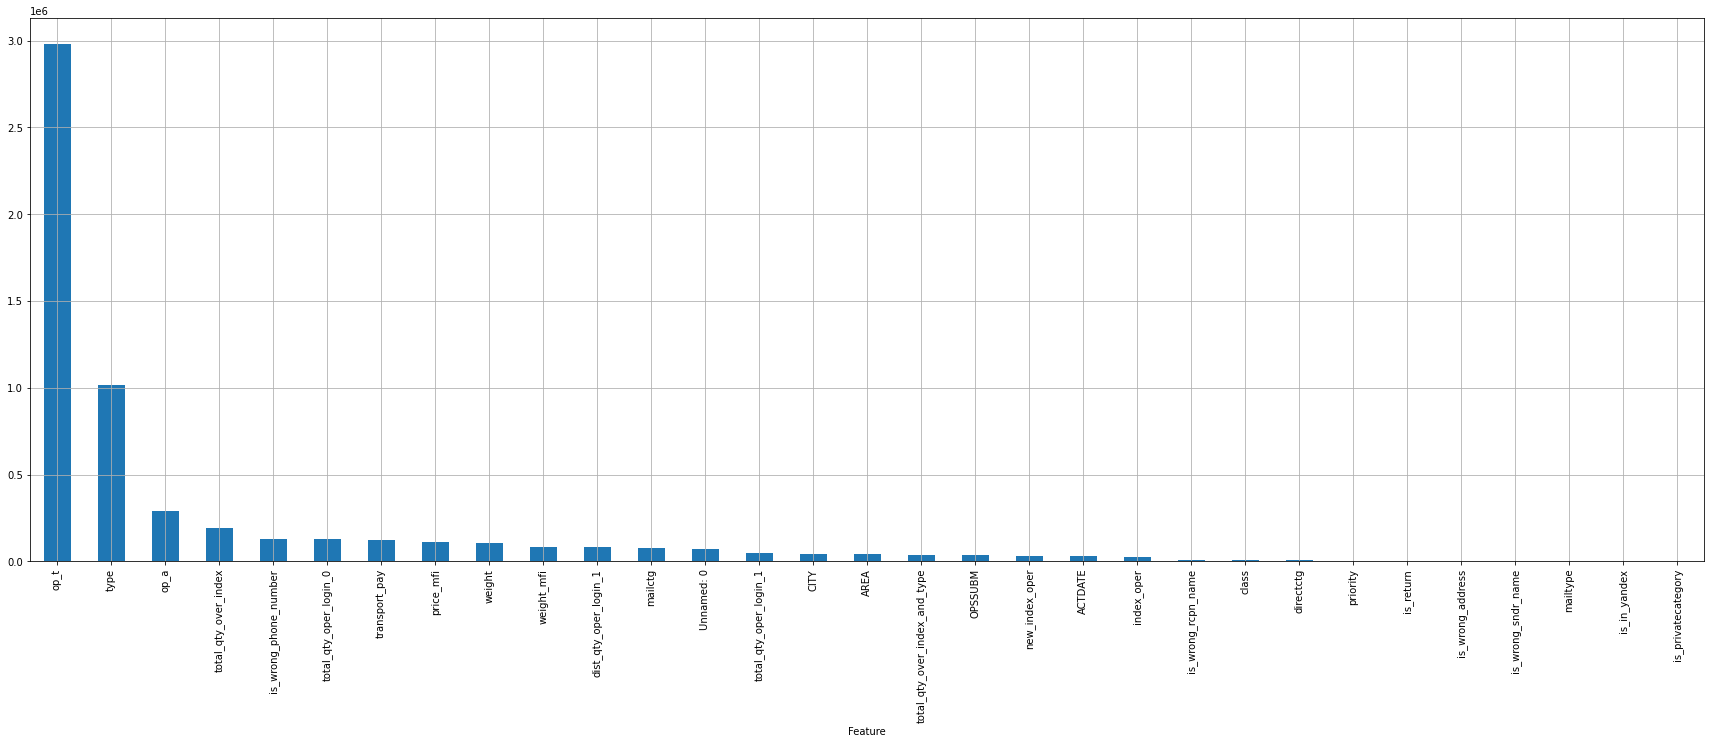

In [ ]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

CPU times: user 60.4 ms, sys: 2.06 ms, total: 62.4 ms
Wall time: 74.2 ms


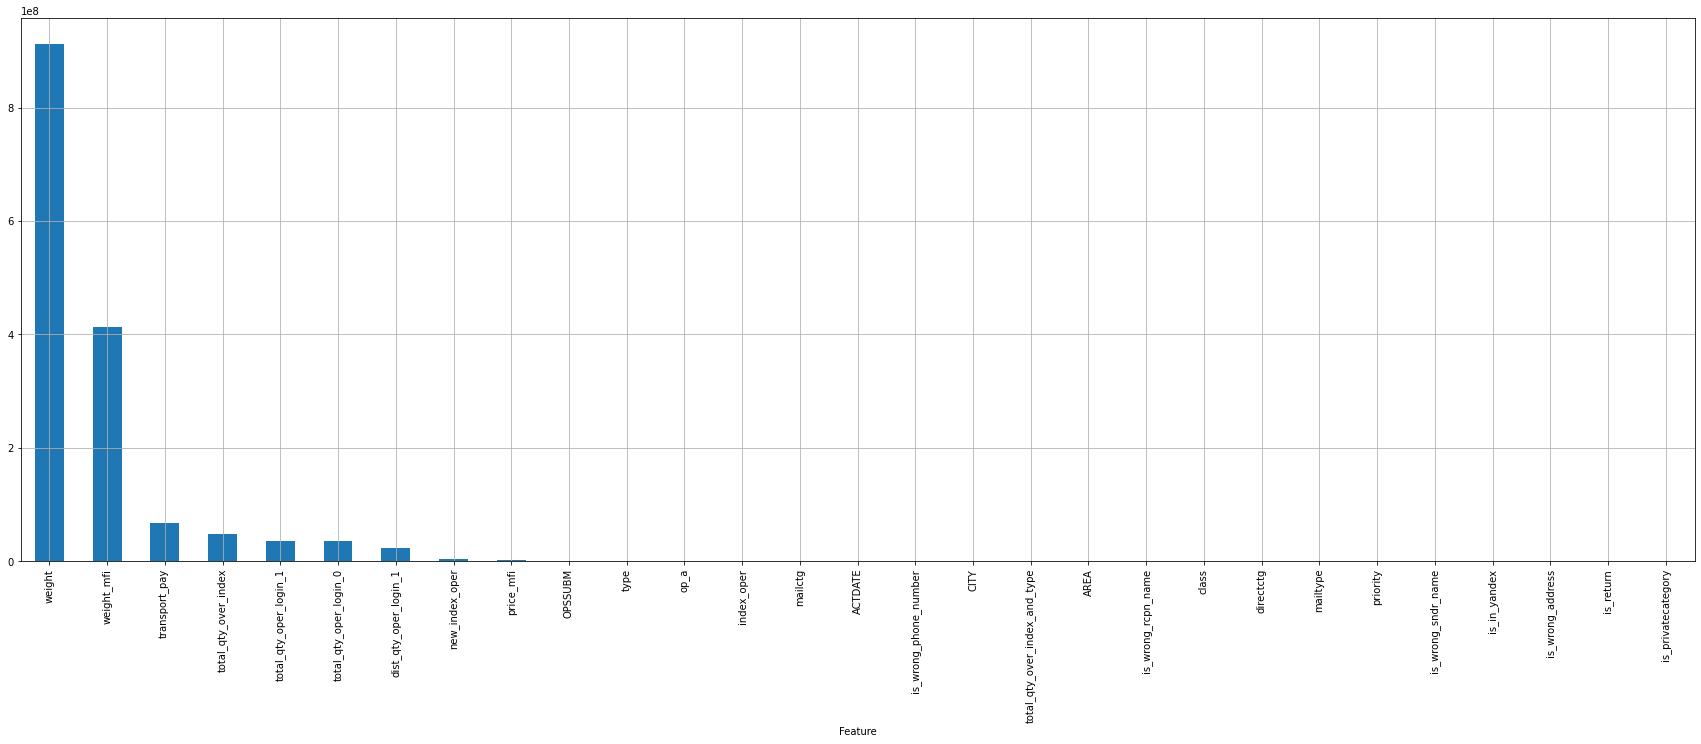

In [ ]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Pochta/test_dataset_test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
test_df

,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,mailctg,mailrank,directctg,transport_pay,postmark,name_mfi,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address
0,7815282,8_13,102976.0,ММПО,7503.0,N,0.0,N,N,85.0,5.0,1.0,0.0,2.0,0.00,0.0,"Screen Protectors,protective case",73.0,489.0,972.0,68766046.0,91123247.0,159889293.0,164927295.0,0,0,0,0
1,8443555,8_2,238753.0,ГОПС,7503.0,N,4.0,Y,N,21.0,5.0,0.0,0.0,2.0,0.00,0.0,String Iron Block,19.0,186.0,2.0,2895.0,1545.0,4440.0,20623.0,0,1,1,0
2,6352559,1020_-1,618254.0,ГОПС,7503.0,N,4.0,Y,N,388.0,5.0,1.0,0.0,2.0,34.01,0.0,Jackets,348.0,500.0,3.0,2751.0,993.0,3744.0,37817.0,0,0,0,0
3,4921420,1016_-1,102968.0,ТИ,7503.0,N,0.0,N,N,1203.0,5.0,1.0,0.0,2.0,83.72,0.0,0,0.0,0.0,69.0,9379609.0,2267333.0,11646942.0,11759329.0,0,1,0,0
4,1420440,1018_-1,102971.0,Цех,7506.0,N,0.0,N,N,956.0,5.0,1.0,0.0,2.0,14.95,0.0,"Unisex Boots,Boots",946.0,1267.0,181.0,76138189.0,8747.0,76146936.0,84110459.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,9030800,1017_1001,655003.0,ГОПС,7503.0,N,4.0,Y,N,53.0,5.0,1.0,0.0,2.0,0.00,0.0,"solder tool(jsd-40a),Keyboard light",61.0,262.0,3.0,4297.0,1803.0,6100.0,64613.0,0,0,0,0
3999996,6275048,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,286.0,5.0,1.0,0.0,2.0,32.05,0.0,0,0.0,0.0,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,1,0,0
3999997,4701757,1022_-1,102969.0,ТИ,7503.0,N,0.0,N,N,733.0,5.0,1.0,0.0,2.0,49.98,0.0,Men Shoes,662.0,300.0,106.0,17348074.0,3469387.0,20817461.0,20821109.0,0,1,0,0
3999998,611153,39_-1,104006.0,Участок,7503.0,N,0.0,N,N,265.0,5.0,1.0,0.0,2.0,0.00,0.0,Dresses,247.0,500.0,2.0,15.0,13673720.0,13673735.0,14041298.0,0,0,0,0


In [ ]:
test_df["is_in_yandex"] = pd.Categorical(test_df["is_in_yandex"])
test_df["is_in_yandex"].astype('category').cat.codes
test_df["is_in_yandex"] = test_df["is_in_yandex"].cat.codes

test_df["is_return"] = pd.Categorical(test_df["is_return"])
test_df["is_return"].astype('category').cat.codes
test_df["is_return"] = test_df["is_return"].cat.codes


In [ ]:
test_df['op_t'] = test_df['oper_type + oper_attr'].apply(op_t).astype('int64')
test_df['op_a'] = test_df['oper_type + oper_attr'].apply(op_a).astype('int64')

In [ ]:
#end_test_pred1 = automl.predict(test_df)

In [ ]:
end_test_pred

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score


In [ ]:


metric = pd.DataFrame(columns = ['alpha','precision','recall','f1','accuracy','roc_auc'])

for x in np.array(list(range(20)))/20 :
    row = []
    tr = te_data['label'].values
    pr = 1*(te_pred.data[:,0] >= x)
    row.append(x)

    row.append(precision_score(te_data['label'].values ,pr))
    row.append(recall_score(te_data['label'].values ,pr))
    row.append(f1_score(te_data['label'].values ,pr))
    row.append(accuracy_score(te_data['label'].values ,pr))

    fp = np.sum((pr == 1) & (tr == 0))
    tp = np.sum((pr == 1) & (tr == 1))

    fn = np.sum((pr == 0) & (tr == 1))
    tn = np.sum((pr == 0) & (tr == 0))

    fpr = (fp / (fp + tn))
    tpr = (tp / (tp + fn))

    roc = (1+ tpr - fpr)/2 


    row.append(roc)

    metric.loc[len(metric.index)] = row



In [ ]:
metric

,alpha,precision,recall,f1,accuracy,roc_auc
0,0.00,0.028608,1.000000,0.055625,0.028608,0.500000
1,0.01,0.160403,0.980513,0.275703,0.852616,0.914681
2,0.02,0.194033,0.963530,0.323018,0.884458,0.922830
3,0.03,0.209801,0.953277,0.343912,0.895947,0.923768
4,0.04,0.228481,0.936528,0.367343,0.907713,0.921696
5,0.05,0.256024,0.910574,0.399673,0.921743,0.916323
6,0.06,0.295148,0.874250,0.441309,0.936673,0.906381
7,0.07,0.331381,0.843839,0.475881,0.946824,0.896848
8,0.08,0.354541,0.825575,0.496053,0.952012,0.890655
9,0.09,0.367710,0.813108,0.506409,0.954654,0.885965


In [ ]:
metric

,alpha,precision,recall,f1,accuracy,roc_auc
0,0.00,0.028608,1.000000,0.055625,0.028608,0.500000
1,0.05,0.256024,0.910574,0.399673,0.921743,0.916323
2,0.10,0.376894,0.805564,0.513528,0.956337,0.883170
3,0.15,0.402706,0.776872,0.530445,0.960653,0.871468
4,0.20,0.428767,0.740431,0.543060,0.964353,0.855690
5,0.25,0.452869,0.698893,0.549605,0.967230,0.837013
6,0.30,0.482587,0.637751,0.549424,0.970075,0.808807
7,0.35,0.527259,0.551325,0.539023,0.973023,0.768384
8,0.40,0.568679,0.450918,0.502998,0.974507,0.720423
9,0.45,0.612168,0.346723,0.442705,0.975027,0.670127


In [ ]:
sum(1*(te_pred.data[:,0] >= 0.2))

59284

In [ ]:
sum(tr_data.label)/4800000

0.02846875

In [ ]:
60000/1200000

0.05

# Pred

In [ ]:
test_df['index_oper'] = test_df['index_oper'].apply(p_to_int)


pld2 = pd.DataFrame(columns = ['index_oper','new_index_oper','OPSSUBM','REGION','AUTONOM','CITY','ACTDATE'])
pld = pd.DataFrame(columns = ['index_oper','new_index_oper'])
pld['index_oper'] = test_df['index_oper'].values
pld2['index_oper'] = test_df['index_oper'].values
qq['new_index_oper'] = qq['INDEX'].values

for i in range(10):
    def from5t6(x):
        if x == '':
            return 0
        x = int(float(x))
        if x // 10**5 == 0:
            return x*10 + i
        return x
    pld['new_index_oper'] = pld['index_oper'].apply(from5t6)
    pld2['new_index_oper'] = pld2['index_oper'].apply(from5t6)
    
    pz = pd.merge(pld, qq[['new_index_oper','OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']],how = 'left', on="new_index_oper")
    
    pld['index_oper'][pz['ACTDATE'].isna() == False]['index_oper'] = pz[pz['ACTDATE'].isna() == False]['new_index_oper'].values
    pld2['index_oper'][pz['ACTDATE'].isna() == False]['index_oper'] = pz[pz['ACTDATE'].isna() == False]['new_index_oper'].values
    #pld[['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']] = pz[pz['ACTDATE'].isna() == False][['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']].values
    pld2.loc[pz['ACTDATE'].isna() == False,['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']] = pz[pz['ACTDATE'].isna() == False][['OPSSUBM','REGION','AUTONOM','CITY','ACTDATE']].values


pld2['AREA'] = (pld2['REGION'].fillna('') + pld2['AUTONOM'].fillna('')).values
pld2.drop(['REGION','AUTONOM'],axis = 1,inplace = True)
pld2.loc[pld2['AREA'] == 'МОСКВА','CITY'] = pld2[pld2['AREA'] == 'МОСКВА']['CITY'].fillna('МОСКВА').values

big_test_df = pd.concat([test_df,pld2.drop(['index_oper'],axis=1)],axis = 1)
big_test_df['ACTDATE'] = pd.to_datetime(big_test_df['ACTDATE'])
big_test_df['index_oper'] = big_test_df['index_oper'].apply(npust)
big_test_df['new_index_oper'] = big_test_df['new_index_oper'].apply(npust)
big_test_df['OPSSUBM'] = big_test_df['OPSSUBM'].fillna(0).apply(npust)



In [ ]:
#big_test_df['Unnamed: 0'] = list(range(4000000))

In [ ]:
end_test_pred = automl.predict(big_test_df)

In [ ]:
sum(1*(end_test_pred.data[:,0] >= 0.05))

406822

In [ ]:
submission = pd.DataFrame(columns = ['id','label'])

In [ ]:
submission['id'] = test_df['id'].values

In [ ]:
submission['label'] = 1*(end_test_pred.data[:,0] >= 0.05)
#submission['label'] = end_test_pred.data[:,0]

In [ ]:
submission['label'].value_counts()

0    3593178
1     406822
Name: label, dtype: int64

In [ ]:
sum(submission['id'] == test_df['id'])

4000000

In [ ]:
submission.to_csv('submission_5_11_7.csv',index = False)

In [ ]:
import joblib

joblib.dump(automl, 'model2.pkl')

['model2.pkl']

In [ ]:
submission

In [ ]:
sum(end_test_pred.data[:,0] < 0.1)

In [ ]:
precision_score([0,1,0,1,0,1,1],[0,0,0,0,0,0,0]),recall_score([0,1,0,1,0,1,1],[1,1,1,1,1,1,1])

In [ ]:
precision_score